# Voronoi Diagram
Enrico Borriello, July 2nd, 2025

A Voronoi diagram divides the plane into regions based on proximity to a set of given points. Each point has a corresponding cell that contains all the locations closer to it than to any other point. Below is a simple example of code to visualize a Voronoi diagram.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [30]:
def generate_points(N, x_min, x_max, y_min, y_max):
    """
    Generate N random 2D points within the given rectangle.
    
    Parameters:
        N (int): Number of points to generate
        x_min, x_max (float): Bounds for x-coordinates
        y_min, y_max (float): Bounds for y-coordinates
    
    Returns:
        np.ndarray: Array of shape (N, 2) with random [x, y] points
    """
    x_coords = np.random.uniform(x_min, x_max, N)
    y_coords = np.random.uniform(y_min, y_max, N)
    return np.column_stack((x_coords, y_coords))

In [64]:
points = generate_points(250, -1, 1, -1, 1)

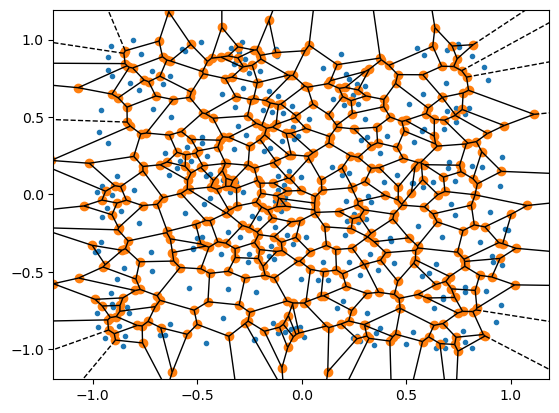

In [66]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

## Area of Voronoi Cells and Shoelace Formula

The following code calculates the areas of Voronoi cells using the $\textbf{shoelace formula}$ (also known as the $\textit{Gauss area formula}$). The $\textbf{shoelace formula}$ allows us to calculate the area of a simple polygon when the coordinates of its vertices are known.

Given a polygon with $n$ vertices listed in order (either clockwise or counterclockwise), with coordinates
$
(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n),
$
the area $A$ of the polygon is given by:

$\boxed{
A = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right|
}$

with the convention that $x_{n+1} = x_1, \quad y_{n+1} = y_1$. This wrapping around to the first vertex ensures the polygon is closed. (The name $\textit{shoelace formula}$ comes from the visual pattern that emerges when the coordinates are written in two columns and lines are drawn connecting terms in the summation.)

The Shoelace Formula works by slicing up the polygon into triangles and rectangles using diagonals, and computing the total "forward" area minus the "backward" area, like canceling out extra space.

In [69]:
# Function to compute polygon area using shoelace formula
def polygon_area(vertices):
    x = vertices[:, 0]
    y = vertices[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Compute areas of finite Voronoi regions
areas = []
for region_index in vor.point_region:
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        # Skip infinite or empty regions
        areas.append(None)
    else:
        polygon = vor.vertices[region]
        area = polygon_area(polygon)
        areas.append(area)

# Display area results
for i, area in enumerate(areas):
    print(f"Region for point {points[i]}: area = {area if area is not None else 'infinite'}")

Region for point [-0.96056941 -0.30745456]: area = 0.032126103508776094
Region for point [-0.29790873 -0.27782875]: area = 0.013404972627505951
Region for point [-0.35186827 -0.6109986 ]: area = 0.031247254961423
Region for point [-0.71631712  0.7948533 ]: area = 0.01426105818932144
Region for point [-0.32269439  0.29077619]: area = 0.020508384977577454
Region for point [ 0.5744256  -0.52990048]: area = 0.024414484343985077
Region for point [0.86418319 0.1738002 ]: area = 0.01355933290901351
Region for point [ 0.85163943 -0.30685736]: area = 0.02579314346794659
Region for point [0.89124484 0.74173292]: area = infinite
Region for point [-0.23056259 -0.93914454]: area = 0.3822392476533274
Region for point [-0.65292409 -0.90623987]: area = 0.01707833203760578
Region for point [ 0.55344912 -0.20243444]: area = 0.03371840184096769
Region for point [-0.90845615 -0.00339616]: area = 0.008632158346881448
Region for point [0.95714625 0.24293615]: area = infinite
Region for point [-0.25375876  0

In [75]:
finite_areas = [A for A in areas if isinstance(A, (int, float))]
smaller_areas = [A for A in finite_areas if A<=.1]

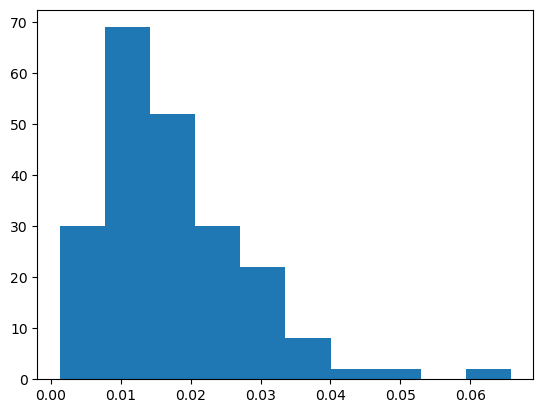

In [79]:
plt.hist(smaller_areas)
plt.show()